In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import train_test_split

In [2]:
def adf_test(timeseries, alpha):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    # print (dfoutput)
    ad_fuller_results = adfuller(timeseries)
    ad_fuller_pval = ad_fuller_results[1]
    ad_fuller_bool = ad_fuller_pval <= alpha
    print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

def kpss_test(timeseries, alpha, trend='c'):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    # print (kpss_output)
    kpss_test_results = kpss(timeseries)
    kpss_pval = kpss_test_results[1]
    kpss_test_bool = kpss_pval >= alpha
    print(f'stationarity from KPSS test: {kpss_test_bool}')

def stationary_test(data, kpss_trend='c', alpha = 0.05):
    adf_test(data, alpha)
    print()
    kpss_test(data, alpha, kpss_trend)

def res_line_plot(residuals):
    plt.figure(figsize=(8, 6))
    plt.plot(residuals)
    plt.title('Residuals')
    plt.legend().remove()
    plt.show()

def res_scatter_plot(residuals):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(residuals)), residuals, color='blue')
    plt.title('Residuals Scatter Plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show()

def res_hist_plot(residuals):
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Histogram')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

def res_acf_plot(residuals):
    plot_acf(residuals, lags=40)
    plt.title('Residuals ACF')
    plt.show()

def res_portmanteau_test(residuals):
    test_results = acorr_ljungbox(residuals, lags=40, return_df=True, boxpierce=True)
    print(test_results)

def check_residuals(residuals):
    res_line_plot(residuals)
    res_scatter_plot(residuals)
    res_hist_plot(residuals)
    res_acf_plot(residuals)
    res_portmanteau_test(residuals)

In [3]:
df = pd.read_csv('/Users/yeochanyoun/Desktop/uchic/courses/Winter2025/Time series/group project/navarrofanclub/final_weekly_counts_df.csv')
cta_df = pd.read_csv('/Users/yeochanyoun/Desktop/uchic/courses/Winter2025/Time series/group project/navarrofanclub/yy/cta_weekly.csv')
temp_df = pd.read_csv('/Users/yeochanyoun/Desktop/uchic/courses/Winter2025/Time series/group project/navarrofanclub/yy/temp_weekly.csv')

In [4]:
df['Week'] = pd.to_datetime(df['Week'])
df.set_index('Week', inplace=True)
df.head()

,Total Counts,Casual User Count,Member User Count,Classic Bike Count,Electric Bike Count
Week,,,,,
2016-09-26,14961,4658,10302,0,0
2016-10-03,88411,19247,69164,0,0
2016-10-10,83531,18678,64849,0,0
2016-10-17,82545,15590,66954,0,0
2016-10-24,69579,12419,57159,0,0


In [5]:
cta_df.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,2016-09-19,W,884989,787408,1672397
1,2016-09-26,WWWWAUW,5321226,4742516,10063742
2,2016-10-03,WWWWAUW,5203831,5093466,10297297
3,2016-10-10,WWWWAUW,5340145,4968338,10308483
4,2016-10-17,WWWWAUW,5336474,4942558,10279032


In [6]:
temp_df.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2016-09-19,21.200000,16.100000,26.100000,4.200000,0.0,214.000000,18.950000,NaN,1014.850000,NaN
1,2016-09-26,16.614286,14.285714,19.342857,11.014286,0.0,199.571429,16.700000,NaN,1016.000000,NaN
2,2016-10-03,17.500000,12.385714,22.457143,3.157143,0.0,182.000000,12.357143,NaN,1020.371429,NaN
3,2016-10-10,17.171429,12.300000,21.728571,3.157143,0.0,208.142857,16.585714,NaN,1016.414286,NaN
4,2016-10-17,13.857143,8.071429,18.428571,0.000000,0.0,237.500000,15.842857,NaN,1017.514286,NaN


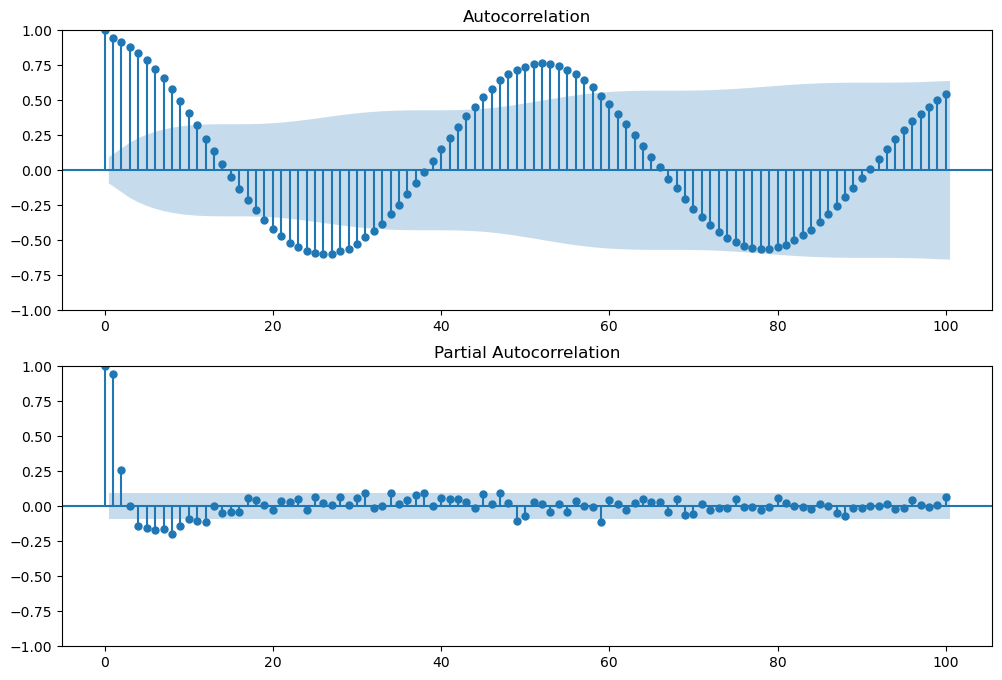

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Total Counts'], lags=100, ax=ax[0])
plot_pacf(df['Total Counts'], lags=100, ax=ax[1])
plt.show()

In [8]:
y_train, y_test = train_test_split(df, test_size=0.2, shuffle=False)

# SARIMA

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(y_train['Total Counts'], order=(2,1,1), seasonal_order=(1,1,1,52))
sarima_fit = sarima_model.fit()
print(sarima_fit.summary())
# sarima_pred = sarima_fit.predict(start=y_test.index[0], end=y_test.index[-1])

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.52406D+00    |proj g|=  6.59310D-02


 This problem is unconstrained.



At iterate    5    f=  9.50628D+00    |proj g|=  2.10799D-03

At iterate   10    f=  9.50624D+00    |proj g|=  4.94788D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     15      1     0     0   1.353D-05   9.506D+00
  F =   9.5062380008816021     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                       Total Counts   No. Observations:                  352
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -3346.196
Date:                     

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Forecast the values for the test set
sarima_pred = sarima_fit.forecast(steps=len(y_test))

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test['Total Counts'], sarima_pred)
rmse = np.sqrt(mean_squared_error(y_test['Total Counts'], sarima_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 13820.713605632796
Root Mean Squared Error (RMSE): 17782.894883308913


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


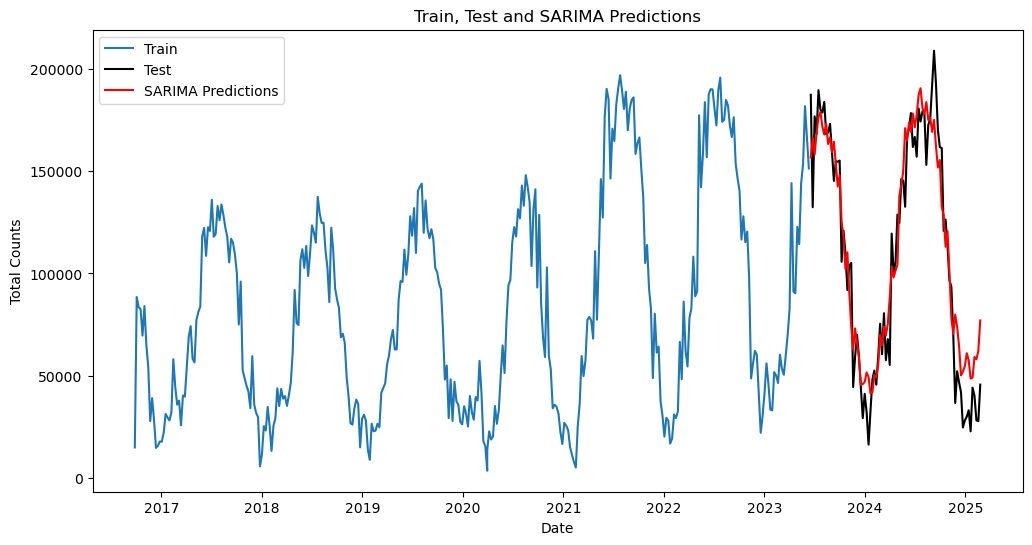

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train['Total Counts'], label='Train')
plt.plot(y_test.index, y_test['Total Counts'], label='Test', color='black')
plt.plot(y_test.index, sarima_pred, label='SARIMA Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Total Counts')
plt.title('Train, Test and SARIMA Predictions')
plt.legend()
plt.show()

# SARIMA + ML

In [22]:
df.reset_index(inplace=True)
df['Week'] = pd.to_datetime(df['Week'])
cta_df['service_date'] = pd.to_datetime(cta_df['service_date'])
temp_df['date'] = pd.to_datetime(temp_df['date'])
merged_df = pd.merge(df, cta_df, left_on='Week', right_on='service_date', how='left')
merged_df = pd.merge(merged_df, temp_df, left_on='Week', right_on='date', how='left')
merged_df['holiday_cnt'] = cta_df['day_type'].str.count('U')
merged_df.drop(columns=['service_date', 'date', 'day_type', 'wpgt', 'tsun', 'Classic Bike Count', 'Electric Bike Count'], inplace=True)
merged_df

,index,Week,Total Counts,Casual User Count,Member User Count,bus,rail_boardings,total_rides,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,holiday_cnt
0,0,2016-09-26,14961,4658,10302,5321226.0,4742516.0,10063742.0,16.614286,14.285714,19.342857,11.014286,0.000000,199.571429,16.700000,1016.000000,0.0
1,1,2016-10-03,88411,19247,69164,5203831.0,5093466.0,10297297.0,17.500000,12.385714,22.457143,3.157143,0.000000,182.000000,12.357143,1020.371429,1.0
2,2,2016-10-10,83531,18678,64849,5340145.0,4968338.0,10308483.0,17.171429,12.300000,21.728571,3.157143,0.000000,208.142857,16.585714,1016.414286,1.0
3,3,2016-10-17,82545,15590,66954,5336474.0,4942558.0,10279032.0,13.857143,8.071429,18.428571,0.000000,0.000000,237.500000,15.842857,1017.514286,1.0
4,4,2016-10-24,69579,12419,57159,5265177.0,5195417.0,10460594.0,11.800000,7.714286,15.171429,4.457143,0.000000,167.142857,15.442857,1020.642857,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,436,2025-01-27,44161,8144,36017,NaN,NaN,NaN,3.857143,-0.157143,7.214286,3.900000,0.000000,150.571429,17.185714,1013.985714,NaN
437,437,2025-02-03,40214,6767,33447,NaN,NaN,NaN,-1.614286,-4.285714,1.528571,0.000000,0.000000,177.285714,15.728571,1024.528571,NaN
438,438,2025-02-10,28167,4415,23752,NaN,NaN,NaN,-5.685714,-9.685714,-2.528571,1.571429,38.166667,164.142857,19.742857,1021.814286,NaN
439,439,2025-02-17,27806,5035,22771,NaN,NaN,NaN,-4.685714,-9.928571,0.314286,0.000000,19.000000,262.714286,16.042857,1026.528571,NaN


In [19]:
y_train, y_test = train_test_split(merged_df, test_size=0.2, shuffle=False)
print(y_train.shape)
print(y_test.shape)

(352, 18)
(89, 18)


In [26]:
from xgboost import XGBRegressor

# SARIMA
sarima_model = SARIMAX(y_train['Total Counts'], order=(2,1,1), seasonal_order=(1,1,1,52))
sarima_fit = sarima_model.fit()
sarima_pred = sarima_fit.predict(start=y_train.index[0], end=y_train.index[-1])


residuals = y_train['Total Counts'] - sarima_pred

# # XGBoost
X_train = y_train[['bus', 'rail_boardings', 'total_rides', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres', 'holiday_cnt']]
X_test = y_test[['bus', 'rail_boardings', 'total_rides', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres', 'holiday_cnt']]

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, residuals)
xgb_pred = xgb_model.predict(X_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.52406D+00    |proj g|=  6.59310D-02


 This problem is unconstrained.



At iterate    5    f=  9.50628D+00    |proj g|=  2.10799D-03

At iterate   10    f=  9.50624D+00    |proj g|=  4.94788D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     15      1     0     0   1.353D-05   9.506D+00
  F =   9.5062380008816021     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
final_pred = sarima_pred + xgb_pred

In [37]:
sarima_forecast = sarima_fit.forecast(steps=len(y_test))
xgb_forecast = xgb_model.predict(X_test)
final_forecast = sarima_forecast + xgb_forecast

In [38]:
# Calculate MAE and RMSE
mae_train = mean_absolute_error(y_train['Total Counts'], final_pred)
rmse_train = np.sqrt(mean_squared_error(y_train['Total Counts'], final_pred))


mae = mean_absolute_error(y_test['Total Counts'], final_forecast)
rmse = np.sqrt(mean_squared_error(y_test['Total Counts'], final_forecast))

print('Train Set Evaluation')
print(f'Mean Absolute Error (MAE): {mae_train}')
print(f'Root Mean Squared Error (RMSE): {rmse_train}')
print()
print('Test Set Evaluation')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Train Set Evaluation
Mean Absolute Error (MAE): 1525.582177581714
Root Mean Squared Error (RMSE): 2141.122425970313

Test Set Evaluation
Mean Absolute Error (MAE): 13675.125302164946
Root Mean Squared Error (RMSE): 17060.066092820853


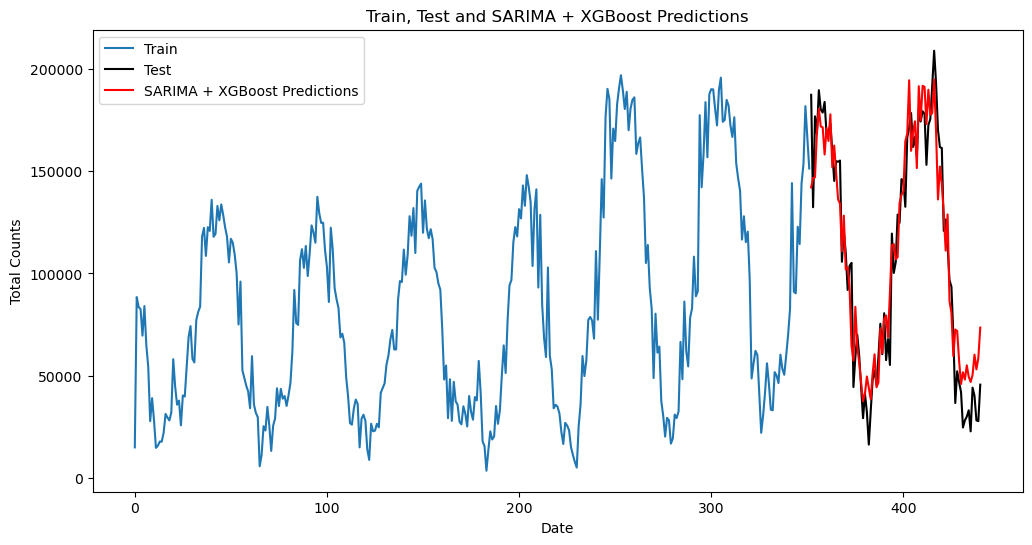

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train['Total Counts'], label='Train')
plt.plot(y_test.index, y_test['Total Counts'], label='Test', color='black')
plt.plot(y_test.index, final_forecast, label='SARIMA + XGBoost Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Total Counts')
plt.title('Train, Test and SARIMA + XGBoost Predictions')
plt.legend()
plt.show()